# Introducción a Redes Neuronales

* Las redes neuronales son un enfoque computacional, que se basa en una gran colección de unidades neurales, para modelar libremente la forma en que un cerebro biológico resuelve problemas con grandes grupos de neuronas biológicas conectados por los axones.

* Hay distintos tipos de modelos de neuronas.

* Hay distintos tipos de interconexión.

* Hay distintos tipos de métodos de aprendizaje.

* Tolerancia a fallas: muerte celular a diario
* Versátil y flexible: se maneja el concepto de aprendizaje y no programación. El proceso de aprendizaje se adapta mejor a cambios de contexto.
* Puede lidiar con información borrosa, estocástica, ruidosa o inconsistente.
* Procesamiento muy fuertemente paralelo.
* Muy alto nivel de integración, con un mínimo consumo de energía.
* Una computadora solo supera al cerebro en tareas basadas en aritmética simple (suma, multiplicación, comparación).
* Un microprocesador I7 tiene aproximadamente  compuertas funcionando con un clock de 3Ghz.
El cerebro humano tiene aproximadamente $10^9$neuronas pero actualización de una neurona está en el orden de los milisengundos.

## Inspiración en neurociencia

Una neurona:

<img src="neurona.png" alt="neurona">

* El axón se bifurca y dichas bifurcaciones se conectan a las dendritas de otras miles de neuronas.
* La trasmisión de la señal del axón a las dendritas es un proceso químico complejo.
* Como producto de este proceso químico el potencial eléctrico dentro de la neurona receptora puede aumentar o disminuir. 
* Si dicho potencial está por encima de un umbral, la neurona se dispara y presenta un estímulo eléctrico en su axón.

Implementación del modelo:

<img src="perceptron.png" alt="perceptron">

En 1943 McCulloch y Pitts propusieron un modelo sencillo de neurona, que modela el comportamiento anteriormente descripto:

$$ \eta_i(t+1)=\theta(\sum_j w_{ij}\eta_j(t)-\mu_i) $$

Donde:

* i corresponde a la neurona de salida.
* J corresponde a las neuronas de entrada.
* $w_{ij}$ modela el comportamiento de la dendrita que conecta a la neurona i con el axón de la neurona J
* $\eta_j(i)$ es el estado de activación de la neurona J, el cual es transmitido a través de su axón.
* $\mu_i$ es el umbral de activación de la neurona i.
* $\theta(x)$ es la función de activación de la neurona i y está definida como:

$$ \eta(x) =
\left\{
	\begin{array}{ll}
		1  & \mbox{si } x \geq 0 \\
		0 & \mbox{si } x < 0
	\end{array}
\right. $$

*McCulloch y Pitts demostraron que una red de esas neuronas es capaz de resolver los mismos problemas que una máquina de Von Neumann, para un conjunto de  dados, aunque en muchos casos mas lentamente.

Diferencia con las neuronaes reales:

* La función de activación es continua y alineal.
* La sumatoria es una función de acumulación no lineal.
* Una neurona real produce un tren de pulsos, no un valor fijo en el tiempo.
* El tiempo de procesamiento de las distintas neuronas es distinto y su actualización no es sincrónica. Veremos mas adelante ejemplos de procesamiento asincrónico.
* El potencial entregado por el axón, puede variar estocásticamente. Esto será modelado mas adelante utilizando funciones de activación estocásticas. 
* Estas diferencias explican por qué son modelos matemáticos inspirados en neurociencia y no es un modelo del cerebro completo.



Hasta ahora hemos elegido los pesos de la red (modelo) calculandolos a priori y luego pusimos a procesar los datos de entrada. Este enfoque no es práctico ya que puede involucrar mucho cálculo a priori.
Otra posibilidad es entrenar a la red en forma iterativa en la cual los  pueden ser ajustados en cada iteración. En el caso de las redes neuronales decimos que la red está aprendiendo la tarea.
La idea es comparar la salida obtenida con una salida deseada y modificar los pesos para que el error disminuya.
Las modificaciones en los pesos serán pequeños de forma que el error entre la salida obtenida y la deseada disminuya un poco, esperando que a través de ese mecanismo los pesos converjan a una solución.

## Redes Feedforward

<img src="redff.jpg" alt="redff">

La unidad fundamental de la red FF es el perceptrón simple, que estudiaremos a continuación.

En general, este tipo de redes pueden implementar memorias heteroasociativas (en las cuales los patrones de entrada  son distintos a los patrones de salida).
Un caso particular de la memoria heteroasociativa es el problema de clasificación en el cual a un patrón de entrada  le corresponde una clase determinada.
Se puede demostrar para perceptrones simples que si existe un conjunto de pesos que solucionan el problema planteado, los podremos encontrar de forma sencilla.
Sin embargo hay una gran cantidad de problemas que no pueden ser solucionados con una red de una sola capa, por eso estudiaremos sus posibilidades y sus limitaciones y mas adelante veremos como expandir estas posibilidades con el uso de una red multicapa.

## Función de activación signo

Con este tipo de función de activación la salida puede valer {+1,-1}, por lo tanto los vectores de salida deseada deben estar compuestos de valores {-1,+1}.
Queremos que se cumpla:

$$sgn(\mathbf{w.\xi_\mu})=\zeta^\mu $$

Para todo $\mu$.
La función $sgn(\mathbf{w.\xi_\mu})$ dará +1 a la salida si la proyección del vector $\xi_\mu$ sobre $\mathbf{w}$ es positiva, y -1 en caso contrario.  
El límite entre proyecciones positivas y negativas sobre $\mathbf{w}$ está dado por la condición: $\mathbf{w.\xi_\mu}=0$.  
Por lo que la condición para que el perceptrón opere correctamente es que los pesos $\mathbf{w}$, determinen un hiperplano que divida en dos el espacio vectorial de entradas, de forma que de un lado queden los vectores cuya salida es +1 y del otro los vectores cuya salida es -1.

La siguiente figura muestra un ejemplo:

<img src="sgn_func.png" alt="sgn">

En la figura de la derecha se muestra una representación alternativa, la cual está dada por:

$$x_k^\mu \equiv \zeta^\mu \xi_k^\mu$$

o bien

$$\mathbf{x}^\mu \equiv \zeta^\mu \mathbf{\hat\xi}^\mu$$

Lo cual traforma la condición (5.5) en:

$$\mathbf{w.x^\mu}>0$$

Lo cual significa que todos los vectores , deben estar del mismo lado del hiperplano perpendicular al vector w, para que el perceptrón funcione correctamente.

## Separabilidad lineal

* Si ese plano no existe, entonces el problema no puede ser resuelto.
* Si ese plano existe, se dice que el problema es **linealmente separable**.
* Si la unidad tiene un threshold:

$$O_i=sgn(\sum_k>0 w_{ij} \xi_k -w_ {io})$$

Entonces el hiperplano que divide el espacio vectorial en dos es:

$$ \mathbf{w.\hat\xi}=w_o$$

Por lo que agregar un bias o threshold nos permite que el hiperplano no pase necesariamente por el origen.

* Ejemplo AND:

<img src="and1.png" alt="sgn"><img src="and2.png" alt="sgn">

* Ejemplo XOR:

<img src="xor1.png" alt="sgn"><img src="xor2.png" alt="sgn">



## Algoritmo de aprendizaje

Para este tipo de problemas un algoritmo de aprendizaje posible es:

$$w(t+1)_{ik}=w(t)_{ik} + \Delta w_{ik}$$ 

$$ \Delta w_{ik} =
\left\{
	\begin{array}{ll}
		2 \eta \zeta_i^\mu \xi_k^\mu  & \mbox{si } \zeta_i^\mu \neq O_i^\mu \\
		0 & \mbox{caso contrario } 
	\end{array}
    \right. $$
    




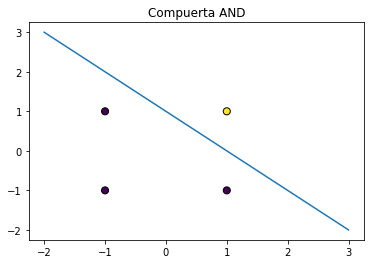

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier, Perceptron
x=np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y=np.array([-1,-1,-1,1])
clf=Perceptron()
clf.fit(x,y)
y_pred=clf.predict(x)
y_pred
i=np.array([-2,3])
j=- clf.intercept_/clf.coef_[0,1] - i * clf.coef_[0,0]/clf.coef_[0,1]
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=50, edgecolor='k')
plt.plot(i,j)
plt.title("Compuerta AND")
plt.show()

Se puede ver la documentación de esta herramienta [acá](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

Notar la siguiente línea:

`Perceptron` and `SGDClassifier` share the same underlying implementation.
In fact, `Perceptron()` is equivalent to `SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)`.

## Redes Multicapa

Ver 'Redes Multicapa (Lab ML).pdf'